Regresja - Celem projektu jest przewidywanie wartości ceny biletu (Fare) pasażerów Titanica

Opis danych:

PassengerId  
Survived - czy pasażer przeżył  
Pclass - klasa pasażera na statku  
Name - imię i nazwisko  
Sex - płeć  
Age - wiek  
SibSp - liczba rodzeństwa i małżonków pasażera na pokładzie  
Parch – liczba rodziców i dzieci pasażera na pokładzie  
Ticket - numer biletu  
Fare – cena biletu  
Cabin - numer kabiny  
Embarked - port, w którym pasażer wsiadł na statek  

In [10]:
#Wczytanie danych
import pandas as pd
file_id = '1iN9t9zZzDC7PRFjQFBhRN9YFU60D1eGH'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url, sep=",")

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Uzupełnienie brakujących wartości
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [13]:
# Wybór cech
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
X = df[features]
#zmiana na zmienne binarne
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
y = df['Fare']

In [14]:
#podział na dane testowe i treningowe
#20% danych testowych, 80% danych treningowych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
#model uczy się na podstawie danych treningowych
model.fit(X_train, y_train)
#model przewiduje czy pasażer przeżył dla danych testowych
y_pred = model.predict(X_test)


#średni błąd kwadratowy między wartościami rzeczywistymi a przewidywanymi
mse = mean_squared_error(y_test, y_pred)
#R^2 Score - współczynnik determinacji (jaka część zmienności zmiennej zależnej jest wyjaśniona przez model)
r2 = r2_score(y_test, y_pred)

print("Średni błąd kwadratowy:", mse)
print("Współczynnik determinacji R^2:", r2)

Średni błąd kwadratowy: 928.6125943999346
Współczynnik determinacji R^2: 0.39989994844402055


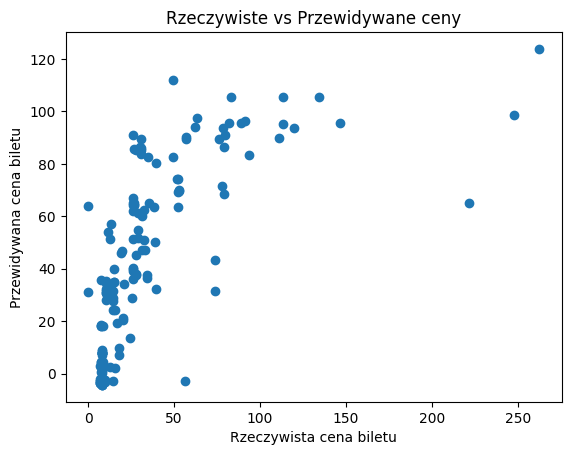

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("Rzeczywista cena biletu")
plt.ylabel("Przewidywana cena biletu")
plt.title("Rzeczywiste vs Przewidywane ceny")
plt.show()